In [1]:
import numpy as np
import matplotlib.pyplot as plt
def length_statics(data_pre):
    segments=np.load(data_pre+'segments.npy',allow_pickle=True)
    durations=np.load(data_pre+'duration.npy',allow_pickle=True)
    print('-'*10)
    plt.hist(x=durations,bins=100,color='yellow',edgecolor='black')
    plt.xlabel('video durations')
    plt.ylabel('frequency')
    plt.title('Distribution of video length')
    plt.show()
    plt.clf()
    plt.close()

    print('-'*10)

    abs_length=[]
    rel_length=[]
    for (dur,segs) in zip(durations,segments):
        if type(dur)==type(np.array([0])):
            dur=dur[0]

        for seg in segs:
            s,e=seg[0],seg[1]
            seg_len=e-s
            abs_length.append(seg_len)
            rel_length.append(seg_len/dur)

    print('-'*10)
    plt.hist(x=abs_length,bins=100,color='steelblue',edgecolor='black')
    plt.xlabel('segment absolute durations')
    plt.ylabel('frequency')
    plt.title('Distribution of segment absolute length')
    plt.show()
    plt.clf()
    plt.close()

    print('-'*10)

    print('-'*10)
    plt.hist(x=rel_length,bins=100,color='green',edgecolor='black')
    plt.xlabel('segment relative durations')
    plt.ylabel('frequency')
    plt.title('Distribution of segment relative length')
    plt.show()
    plt.clf()
    plt.close()

    print('-'*10)

../ActivityNet1.2-Annotations/
----------


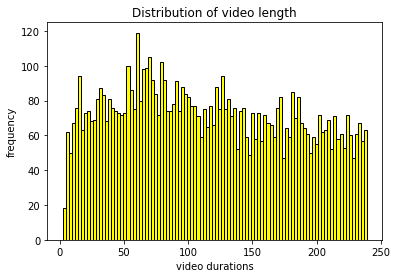

----------
----------


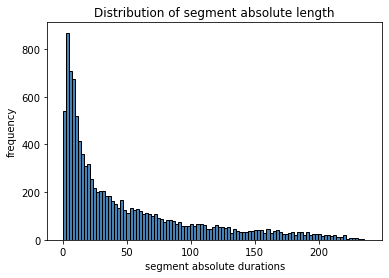

----------
----------


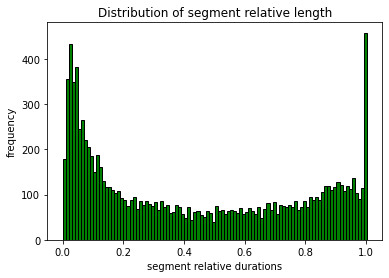

----------


In [9]:
data_pre='../ActivityNet1.2-Annotations/'
print(data_pre)
length_statics(data_pre)
'''
Conclusion:
1. ActivityNet is long, and the lengths of the action instances are long too.
2. This is suitable for anchor based model, but how to find out the proper one is an important problem
'''

../Thumos14reduced-Annotations/
----------


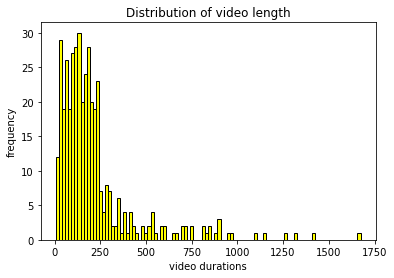

----------
----------


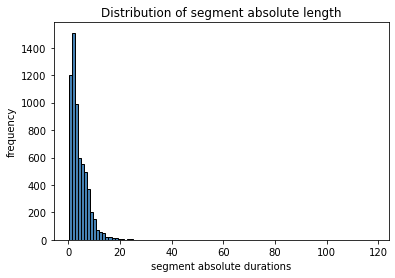

----------
----------


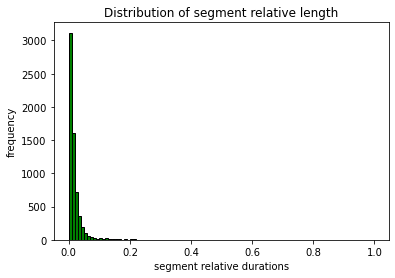

----------


In [10]:
data_pre='../Thumos14reduced-Annotations/'
print(data_pre)
length_statics(data_pre)
'''
Conclusions:
1. Action instances of Thumos14 are short, below 0.2* video length.
'''

./Dataset/ActivityNet1.3-Annotations/
----------


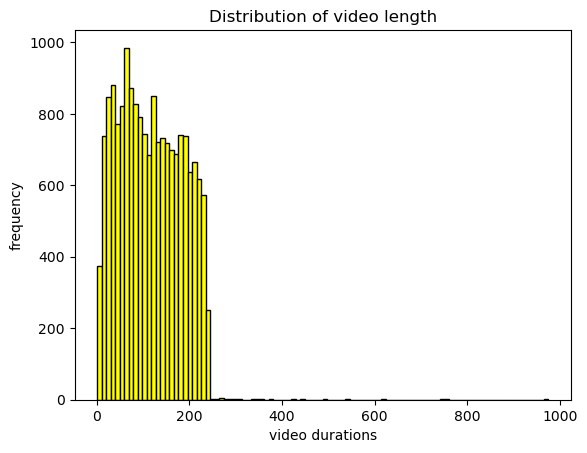

----------
----------


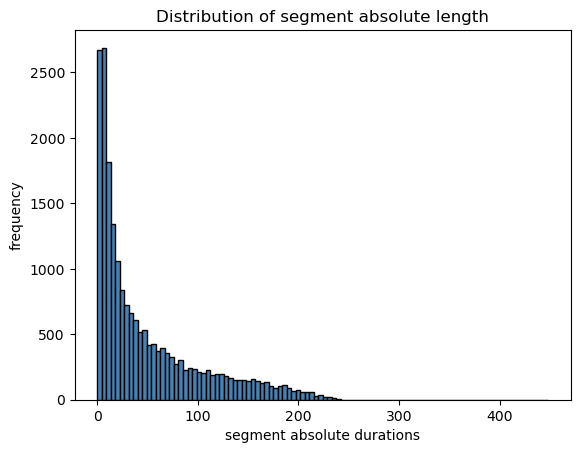

----------
----------


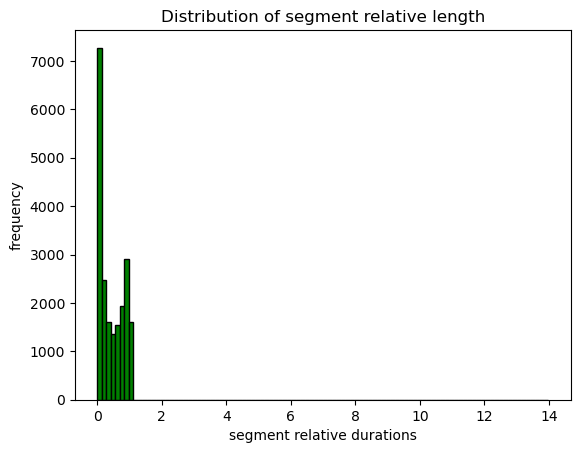

----------


'\nConclusion:\n1. ActivityNet is long, and the lengths of the action instances are long too.\n2. This is suitable for anchor based model, but how to find out the proper one is an important problem\n'

In [2]:
data_pre='./Dataset/ActivityNet1.3-Annotations/'
print(data_pre)
length_statics(data_pre)
'''
Conclusion:
1. ActivityNet is long, and the lengths of the action instances are long too.
2. This is suitable for anchor based model, but how to find out the proper one is an important problem
'''

In [14]:
# statistic the average number of action category for different dataset
import numpy as np

labels_all = np.load('./Dataset/Thumos14reduced-Annotations/labels_all.npy',allow_pickle=True)
labels = np.load('./Dataset/Thumos14reduced-Annotations/labels.npy',allow_pickle=True)
subset = np.load('./Dataset/Thumos14reduced-Annotations/subset.npy',allow_pickle=True)
segments = np.load('./Dataset/Thumos14reduced-Annotations/segments.npy',allow_pickle=True)
train_idx = []
test_idx = []
for i,item in enumerate(subset):
    if item.decode("utf-8")=='validation':
        train_idx.append(i)
    elif item.decode("utf-8") == 'test':
        test_idx.append(i)


train_action_classes = dict()
test_action_classes = dict()
for id in train_idx:
    action_classes = len(labels_all[id])
    if action_classes not in train_action_classes.keys():
        train_action_classes[action_classes]=set()
    train_action_classes[action_classes].add(id)
for id in test_idx:
    action_classes = len(labels_all[id])
    if action_classes not in test_action_classes.keys():
        test_action_classes[action_classes]=set()
    test_action_classes[action_classes].add(id)


print(f"train 1 action number: {len(train_action_classes[1])}, train 2 action number: {len(train_action_classes[2])}")
print(f"the percent of 2 action is: {len(train_action_classes[2])/(len(train_action_classes[1])+len(train_action_classes[2]))}")

print(f"test 1 action number: {len(test_action_classes[1])}, test 2 action number: {len(test_action_classes[2])}")
print(f"the percent of 2 action is: {len(test_action_classes[2])/(len(test_action_classes[1])+len(test_action_classes[2]))}")

print(f"all dataset the percent of 2 action: {(len(train_action_classes[2])+len(test_action_classes[2]))/(len(train_action_classes[1])+len(train_action_classes[2])+len(test_action_classes[1])+len(test_action_classes[2]))}")

print(f"the average number of action categories per video: {(179+181+21*2+29*2)/(179+21+181+29)}")

action_instance_number = 0
for seg in segments:
    action_instance_number+=len(seg)
print(f"average action instance per video: {action_instance_number/413}")

train 1 action number: 179, train 2 action number: 21
the percent of 2 action is: 0.105
test 1 action number: 181, test 2 action number: 29
the percent of 2 action is: 0.1380952380952381
all dataset the percent of 2 action: 0.12195121951219512
the average number of action categories per video: 1.1219512195121952
average action instance per video: 15.411622276029055


In [10]:
import numpy as np

labels_all = np.load('./Dataset/ActivityNet1.3-Annotations/labels_all.npy',allow_pickle=True)
labels = np.load('./Dataset/ActivityNet1.3-Annotations/labels.npy',allow_pickle=True)
subset = np.load('./Dataset/ActivityNet1.3-Annotations/subset.npy',allow_pickle=True)
train_idx = []
test_idx = []
for i,item in enumerate(subset):
    if item=='train':
        train_idx.append(i)
    elif item == 'val':
        test_idx.append(i)

train_action_classes = dict()
test_action_classes = dict()
for id in train_idx:
    action_classes = len(labels_all[id])
    if action_classes not in train_action_classes.keys():
        train_action_classes[action_classes]=set()
    train_action_classes[action_classes].add(id)
for id in test_idx:
    action_classes = len(labels_all[id])
    if action_classes not in test_action_classes.keys():
        test_action_classes[action_classes]=set()
    test_action_classes[action_classes].add(id)


print(f"train 1 action number: {len(train_action_classes[1])}, train 2 action number: {len(train_action_classes[2])}")
print(f"the percent of 2 action is: {len(train_action_classes[2])/(len(train_action_classes[1])+len(train_action_classes[2]))}")

print(f"test 1 action number: {len(test_action_classes[1])}, test 2 action number: {len(test_action_classes[2])}")
print(f"the percent of 2 action is: {len(test_action_classes[2])/(len(test_action_classes[1])+len(test_action_classes[2]))}")

print(f"all dataset the percent of 2 action: {(len(train_action_classes[2])+len(test_action_classes[2]))/(len(train_action_classes[1])+len(train_action_classes[2])+len(test_action_classes[1])+len(test_action_classes[2]))}")

print(f"the average number of action categories per video: {(9028+4421+4*2+6*2)/(9028+4421+4+6)}")

train 1 action number: 9028, train 2 action number: 4
the percent of 2 action is: 0.0004428697962798937
test 1 action number: 4421, test 2 action number: 6
the percent of 2 action is: 0.0013553196295459679
all dataset the percent of 2 action: 0.0007429972509101717
the average number of action categories per video: 1.00074299725091


Compting:
- The Percentage of action Snippet exhibiting Overlapping subtle actions (PSO) 
- Average Relative Duration of action instances to the whole video (ARD)
- The Average number of action Instances per Video (AIV)


In [233]:
import numpy as np
from tqdm import tqdm
dataset_name = "ActivityNet1.3" # MultiThumos, ActivityNet1.3, Thumos14reduced

labels_all = np.load('./Dataset/'+ dataset_name + '-Annotations/labels_all.npy',allow_pickle=True) # video-level label
labels = np.load('./Dataset/'+ dataset_name + '-Annotations/labels.npy',allow_pickle=True) # instance-level label
subset = np.load('./Dataset/'+ dataset_name + '-Annotations/subset.npy',allow_pickle=True)
segments = np.load('./Dataset/'+ dataset_name + '-Annotations/segments.npy', allow_pickle=True)
duration = np.load('./Dataset/'+ dataset_name + '-Annotations/duration.npy', allow_pickle=True)
classlist = np.load('./Dataset/'+ dataset_name + '-Annotations/classlist.npy', allow_pickle=True)
videoname = np.load('./Dataset/'+ dataset_name + '-Annotations/videoname.npy', allow_pickle=True)

if 'Thumos' in dataset_name:
    classlist_dict = {classname.decode():idx for idx, classname in enumerate(classlist) }
    videoname_dict = {vn.decode():idx for idx, vn in enumerate(videoname)}
else: 
    classlist_dict = {classname:idx for idx, classname in enumerate(classlist) }
    videoname_dict = {vn:idx for idx, vn in enumerate(videoname)}
video_num = len(labels)
print(classlist_dict)

{b'Applying sunscreen': 0, b'Archery': 1, b'Arm wrestling': 2, b'Assembling bicycle': 3, b'BMX': 4, b'Baking cookies': 5, b'Ballet': 6, b'Bathing dog': 7, b'Baton twirling': 8, b'Beach soccer': 9, b'Beer pong': 10, b'Belly dance': 11, b'Blow-drying hair': 12, b'Blowing leaves': 13, b'Braiding hair': 14, b'Breakdancing': 15, b'Brushing hair': 16, b'Brushing teeth': 17, b'Building sandcastles': 18, b'Bullfighting': 19, b'Bungee jumping': 20, b'Calf roping': 21, b'Camel ride': 22, b'Canoeing': 23, b'Capoeira': 24, b'Carving jack-o-lanterns': 25, b'Changing car wheel': 26, b'Cheerleading': 27, b'Chopping wood': 28, b'Clean and jerk': 29, b'Cleaning shoes': 30, b'Cleaning sink': 31, b'Cleaning windows': 32, b'Clipping cat claws': 33, b'Cricket': 34, b'Croquet': 35, b'Cumbia': 36, b'Curling': 37, b'Cutting the grass': 38, b'Decorating the Christmas tree': 39, b'Disc dog': 40, b'Discus throw': 41, b'Dodgeball': 42, b'Doing a powerbomb': 43, b'Doing crunches': 44, b'Doing fencing': 45, b'Doing

In [89]:
'''
PSO
'''
PSO_list = []
category_num = 200
video_length = 10000

for idx in tqdm(range(video_num)):
    # compute the percentage of single video    
    ## convert the annotation to a 2D array TxC
    matrix = np.zeros((video_length,category_num)) # [T,C]
    video_second = duration[idx]

    if len(segments[idx])==0: # don't process test set in activityNet1.3 
        continue 
    for seg, label in zip(segments[idx],labels[idx]):
        ## convert the timestamps to time index
        start_idx, end_idx = int((seg[0]/video_second)*video_length), int((seg[1]/video_second)*video_length)
        # print(f"start_idx:{start_idx}, end_idx:{end_idx}")
        cls_idx = classlist_dict[label]
        # print(f"cls_idx:{cls_idx}, label:{label}")
        matrix[start_idx:end_idx,cls_idx] = 1
        # print(matrix[:,cls_idx])
    matrix_sum = matrix.sum(axis=1) # [T]
    ## count the number of action snippet
    # num_action_snippet = np.nonzero(matrix_sum)
    num_action_snippet = np.count_nonzero(matrix_sum)
    # print(f"num_action_snippet:{num_action_snippet}")

    ## count the number of overlapping snippet
    num_overlapping_snippet = len(np.where(matrix_sum>1)[0])
    # print(f"num_overlapping_snippet:{num_overlapping_snippet}")

    if num_action_snippet !=0:
        pso = num_overlapping_snippet/num_action_snippet
    else:
        pso = 0
    PSO_list.append(pso)
PSO_list = np.array(PSO_list)
# print(f"The PSO_list of dataset {dataset_name} is {PSO_list}.")
PSO = PSO_list.mean()
print(f"The PSO of dataset {dataset_name} is {PSO}.")

100%|██████████| 17999/17999 [01:00<00:00, 297.33it/s]

The PSO of dataset ActivityNet1.3 is 0.00033619954789370406.


In [96]:
'''
ARD
'''
ARD_list = []
for idx in tqdm(range(video_num)):
    video_ARD_list = []
    video_second = duration[idx]
    if len(segments[idx])==0: # don't process test set in activityNet1.3 
        continue 
    for seg, label in zip(segments[idx],labels[idx]):
        instance_duration = seg[1]-seg[0]
        percentage = instance_duration/video_second
        video_ARD_list.append(percentage)
    video_ARD_list = np.array(video_ARD_list)
    video_ARD = video_ARD_list.mean()
    ARD_list.append(video_ARD)
ARD_list = np.array(ARD_list)
# print(f"The ARD_list of dataset {dataset_name} is {ARD_list}.")
ARD = ARD_list.mean()
print(f"The ARD of dataset {dataset_name} is {ARD}.")

100%|██████████| 412/412 [00:00<00:00, 21678.44it/s]

The ARD of dataset Thumos14reduced is 0.05849929674785926.


In [102]:
'''
AIV
'''
AIV_list = []
for idx in tqdm(range(video_num)):
    if len(segments[idx])==0: # don't process test set in activityNet1.3 
        continue 
    AIV_list.append(len(segments[idx]))
AIV_list = np.array(AIV_list)
# print(f"The AIV_list of dataset {dataset_name} is {AIV_list}.")
AIV = AIV_list.mean()
print(f"The AIV of dataset {dataset_name} is {AIV}.")

100%|██████████| 17999/17999 [00:00<00:00, 1199715.18it/s]

The AIV of dataset ActivityNet1.3 is 1.5416449959135152.


video_second:[528.7153514]


<AxesSubplot:>

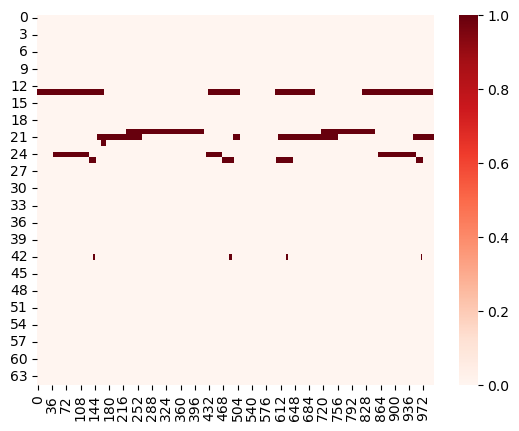

In [140]:
# find the information for specify video
import seaborn as sns
idx = videoname_dict['video_test_0001495']
video_second = duration[idx]
print(f"video_second:{video_second}")

# print(segments[idx])
# print(labels[idx])

matrix = np.zeros((1000,65)) # [T,C]

for seg, label in zip(segments[idx],labels[idx]):
    start_idx, end_idx = int((seg[0]/video_second)*video_length), int((seg[1]/video_second)*video_length)
    cls_idx = classlist_dict[label]
    matrix[start_idx:end_idx,cls_idx] = 1
sns.heatmap(matrix.transpose(1,0),cmap='Reds')

In [145]:
print(f"{classlist[13]}, {classlist[24]},{classlist[25]}")
print(labels_all[idx])

b'LongJump', b'Run',b'Jump'
['OneRaisedArmCelebrate', 'Sit', 'Walk', 'Jump', 'BodyContract', 'FistPump', 'ClapHands', 'Throw', 'StandUp', 'Run', 'LongJump']


In [349]:
# statistic the video in which the action duraction all exceed 3 minutes, save as a list
long_vn_list = []
for idx in tqdm(range(video_num)):
    if subset[idx] != "val": # only choose the subset of "val"
        continue 
    flag = True
    for seg, label in zip(segments[idx],labels[idx]):
        instance_duration = seg[1]-seg[0]
        if instance_duration<120: # 这里写的是排除的视频要去
            flag = False
            break
    if flag:
        long_vn_list.append(videoname[idx])
print(f"number of long duraction videos:{len(long_vn_list)}")
np.save("./long_vn_list.npy",long_vn_list)
with open("./long_vn_list.txt","w") as f:
    for line in long_vn_list:
        f.write(line+'\n')


100%|██████████| 17999/17999 [00:00<00:00, 817974.04it/s]

number of long duraction videos:860


In [359]:
# statistic the video that only contains one action instance, save as a list
sparse_vn_list = []
for idx in tqdm(range(video_num)):
    if subset[idx] != "val": # only choose the subset of "val"
        continue 

    if len(segments[idx])==1:
        sparse_vn_list.append(videoname[idx])
    # if len(segments[idx])==1:
    #     instance_duration = segments[idx][0][1]-segments[idx][0][0]
    #     if instance_duration<200:
    #         sparse_vn_list.append(videoname[idx])
print(f"number of sparse action videos:{len(sparse_vn_list)}")
np.save("./sparse_vn_list.npy",sparse_vn_list)
with open("./sparse_vn_list.txt","w") as f:
    for line in sparse_vn_list:
        f.write(line+'\n')

100%|██████████| 17999/17999 [00:00<00:00, 947087.32it/s]

number of sparse action videos:3340


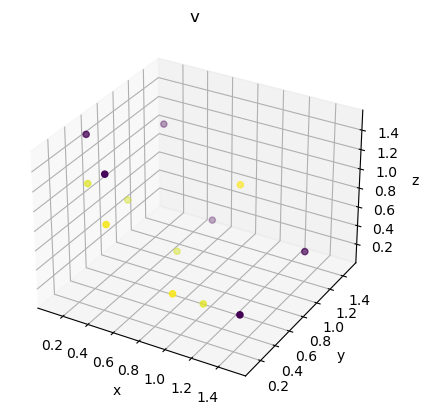

In [368]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 示例数据
x = [1.0,1.0,0.5,0.5,0.1,0.1,1.5,0.5,0.1,1.5,0.1,0.5,1.0]
y = [0.1,0.5,0.1,1.0,0.5,1.0,1.0,0.1,1.5,0.1,0.5,1.5,1.0]
z = [0.5,0.1,1.0,0.1,1.0,0.5,0.5,1.5,1.0,0.5,1.5,0.1,1.0]
v = [48.2,46.9,48.0,46.2,46.6,45.8,11.1,11.1,11.1,11.1,11.1,11.1,48.6]
# 创建 3D 图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制 3D 散点图
ax.scatter(x, y, z, c=v, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('v')

plt.show()
